*** MEDIDAS DE SIMILARIDAD ***

Datos del Drive. 
1. Conexión y permisos con el drive personal

In [86]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


2. Ubicación de las carpetas a utilizar

In [87]:
#%cd /content/gdrive/My Drive/0_Desarrollo_Tesis/2.Resultados_Preprocesamiento/
%cd /content/gdrive/My Drive/0_Desarrollo_Tesis/

/content/gdrive/My Drive/0_Desarrollo_Tesis


3. Listar la lista del contenido de la ruta

In [ ]:
!ls /content/gdrive/My\ Drive/0_Desarrollo_Tesis/5.Resultados_Histogramas/Eigen_Perros_Entrada/*

'/content/gdrive/My Drive/0_Desarrollo_Tesis/5.Resultados_Histogramas/Eigen_Perros_Entrada/histograma_caracteristicas.csv'
'/content/gdrive/My Drive/0_Desarrollo_Tesis/5.Resultados_Histogramas/Eigen_Perros_Entrada/histograma_ruta_eigen.csv'
'/content/gdrive/My Drive/0_Desarrollo_Tesis/5.Resultados_Histogramas/Eigen_Perros_Entrada/histograma_ruta_redimensionada.csv'


*** FUNCION DISTANCIA EUCLIDIANA***

In [88]:
import math
import numpy as np
#imagen_entrada, imagen_dataset
def distancia_euclidiana(x,y):
  suma=0
  for j in range(256):
    numx=(int(x[0:255][j]))
    numy=(int(y[0:255][j]))
    elevado=pow(numx-numy,2)
    suma=elevado+suma
  return math.sqrt(suma)

*** FUNCION Distancia Manhattan ***

In [89]:
import math
import numpy as np
#imagen_entrada, imagen_dataset
def distancia_manhattan(x,y):
  suma=0
  for j in range(256):
    numx=(int(x[0:255][j]))
    numy=(int(y[0:255][j]))
    valor_absoluto=abs(numx-numy)
    suma=suma+valor_absoluto
  return suma

*** Lectura de Caracteristicas ***

In [106]:
import numpy as np
import pandas as pd

def funcion_prueba(ARRAY_DATASET,ARRAY_IMAGEN, MEDIDA): #, MEDIDA PENDIENTE

  
  print("FUNCION ARRAY")
  if os.path.isfile(ARRAY_DATASET[0]):
    print('1. El archivo existe.')
  else:
    print('1. El no archivo existe.')

  print("FUNCION ARRAY")
  if os.path.isfile(ARRAY_IMAGEN[0]):
    print('1. El archivo existe.')
  else:
    print('1. El no archivo existe.')

  print("FUNCION ARRAY")
  if os.path.isfile(ARRAY_IMAGEN[2]):
    print('1. El archivo existe.')
  else:
    print('1. El no archivo existe.')
  
  

  
  #Imagen de DataSet
  lectura_histograma_dataset = pd.read_csv(ARRAY_DATASET[0], header= None)
  lab_dataset = pd.read_csv(ARRAY_DATASET[1],header=None ,dtype=str)
  lab_dataset_original = pd.read_csv(ARRAY_DATASET[2],header=None ,dtype=str)
  
  #Imagen de entrada 
  lectura_histograma = pd.read_csv(ARRAY_IMAGEN[0], header= None)
  lab = pd.read_csv(ARRAY_IMAGEN[2],header=None ,dtype=str)
  
  #print(lectura_histograma[0:255][0:1]) #[columna][fila]
  entrada_imagen=lectura_histograma[0:255][0:1]

  if MEDIDA==1:
    print('distancia_euclidiana')
    resultado=[]
    #print(len(lab_dataset))
    
    for i in range(len(lab_dataset)):
      dataset_imagen=lectura_histograma_dataset[0:255][(i):(i+1)]
      #Resultados de la distancia euclidiana
      resultado.append(distancia_euclidiana(entrada_imagen,dataset_imagen))



    #print(resultado)
    pos_min=resultado.index(min(resultado))
    pos_min=pos_min-1
    if (pos_min < 0):
      pos_min = 0
    print(resultado.index(min(resultado)))

    #print(lab_dataset)
    #print(lab_dataset_original[0][pos_max]) #[columna][fila]
    imagen_resultado=lab_dataset_original[0][pos_min]

    print("  **********IMAGEN RESULTADO*********** ") 
    imagen_imprime(imagen_resultado)
    print("  ** Valor "+ str(resultado[pos_min+1]))  
    print("  ******************************** ") 


    #print(lab_dataset_original[0][pos_min]) #[columna][fila]
    #print(lab[0][0]) #[columna][fila]
    #print(lab_dataset[0][pos_max]) #[columna][fila]
    imagen_resultado_extraccion=lab[0][0]
    print("   **********IMAGEN ENTRADA***********  ") 
    imagen_imprime(imagen_resultado_extraccion)
    print("  ******************************** ") 

    imagenes_top=sorted(resultado)
    #print("IMAGENES DEL TOP 10 ") 
    #print(imagenes_top)

    #print("IMAGENES DEL origen  ") 
    #print(resultado)
    
    
    #for j in range(len(resultado)):
    #   print(lab_dataset_original[0][j]+ "; "+ str(resultado[j]))

    for i in range(10):
      for j in range(len(resultado)):
        #print(str(j) +" "+ str(len(resultado)))
        if (imagenes_top[i]==resultado[j]):
          print("********************************")
          pos_min=resultado.index(imagenes_top[i])
          pos_min=pos_min-1
          if (pos_min < 0):
            pos_min = 0
          imagen_imprime(lab_dataset_original[0][pos_min])
          print("GATO TOP "+str(i)+ " img " +str(imagenes_top[i])+ " Posicion "+str(pos_min)+ " ruta "+lab_dataset_original[0][pos_min])
          break;
  
  elif MEDIDA==2:
    print('distancia_manhattan')
    resultado=[]
    for i in range(len(lab_dataset)):
      dataset_imagen=lectura_histograma_dataset[0:255][(i):(i+1)]
      #Resultados de la distancia_manhattan
      resultado.append(distancia_manhattan(entrada_imagen,dataset_imagen))
  
    print(resultado)
    pos_min=resultado.index(min(resultado))
    pos_min=pos_min-1
    if (pos_min < 0):
      pos_min = 0
    print(resultado.index(min(resultado)))

    #print(lab_dataset)
    #print(lab_dataset_original[0][pos_max]) #[columna][fila]
    imagen_resultado=lab_dataset_original[0][pos_min]

    print("  **********IMAGEN RESULTADO*********** ") 
    imagen_imprime(imagen_resultado)
    print("  ** Valor "+ str(resultado[pos_min+1]))  
    print("  ******************************** ") 
    
    #print(lab_dataset[0][pos_max]) #[columna][fila]
    imagen_resultado_extraccion=lab[0][0]
    print("   **********IMAGEN ENTRADA***********  ") 
    imagen_imprime(imagen_resultado_extraccion)
    print("  ******************************** ")

    imagenes_top=sorted(resultado)

    for i in range(10):
      for j in range(len(resultado)):
        #print(str(j) +" "+ str(len(resultado)))
        if (imagenes_top[i]==resultado[j]):
          print("********************************")
          pos_min=resultado.index(imagenes_top[i])
          pos_min=pos_min-1
          if (pos_min < 0):
            pos_min = 0
          imagen_imprime(lab_dataset_original[0][pos_min])
          print("GATO TOP "+str(i)+ " img " +str(imagenes_top[i])+ " Posicion "+str(pos_min)+ " ruta "+lab_dataset_original[0][pos_min])
          break;


  else:
    print('Ninguna medida')

*** IMAGEN RESULTADO ***

In [107]:
#imagen resultado que tiene mas similitud con la imagen de entrada.
import cv2
import numpy as np
from matplotlib import pyplot as plt
def imagen_imprime(imagen):
  img = cv2.imread(imagen)
  img_cvt=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  plt.imshow(img_cvt)
  plt.show()


*** Preguntas de flujo ***

In [92]:
# Importar Librerias

import dlib, cv2, os
from imutils import face_utils
import numpy as np
import matplotlib.pyplot as plt
import os
from skimage import io, color
import cv2 as cv

In [98]:
def menu_tesis():
  print("-----------        Tesis U Catolica      -----------")
  print("----------- ** Medidas de similaridad ** -----------")
  print("----- Seleccione la tecnica por la que desea implementar -----")
  print("1. Eigen - (Perros - Buscar Perro)")
  print("2. Eigen - (Gatos - Buscar Gato)")
  print("3. Fisher - (Perros - Buscar Perro)")
  print("4. Fisher - (Gatos - Buscar Gato)")
  print("5. LPBH - (Perros - Buscar Perro)")
  print("6. LPBH - (Gatos - Buscar Gato)")
  print("-----------------------------------")

def menu_opcion():
  print("----------- Medidas de similaridad -----------")
  print("1. Distancia Euclidiana")
  print("2. Distancia Manhattan")
  print("-----------------------------------")

def seleccion_menu():
  menu_tesis()
  mopcion = int(input("Seleccione una opcion: "))
  caso_menu(mopcion)

def seleccion_opcion(mopcion):
  menu_opcion()
  opcion = int(input("Seleccione una opcion: "))
  #print(mopcion)
  #print(opcion)
  caso_opcion(mopcion,opcion)

In [108]:

class caso_opcion:
  def __init__(self, mopcion,opcion):

    #*****************
    #      EIGEN
    #*****************

    if mopcion== 1 and opcion == 1: 
      print('1. Eigen - (Perros - Buscar Perro), 1. Distancia Euclidiana')

      CARACTERISTICAS_UNO='5.Resultados_Histogramas/Eigen_Perros/histograma_caracteristicas.csv'
      CARACTERISTICAS_UNO_ruta='5.Resultados_Histogramas/Eigen_Perros/histograma_ruta_eigen.csv'
      CARACTERISTICAS_UNO_ruta_original='5.Resultados_Histogramas/Eigen_Perros/histograma_ruta_redimensionada.csv'
      ARRAY_DATASET=[CARACTERISTICAS_UNO, CARACTERISTICAS_UNO_ruta, CARACTERISTICAS_UNO_ruta_original]

      CARACTERISTICAS_DOS='5.Resultados_Histogramas/Eigen_Perros_Entrada/histograma_caracteristicas.csv'
      CARACTERISTICAS_DOS_ruta='5.Resultados_Histogramas/Eigen_Perros_Entrada/histograma_ruta_eigen.csv'
      CARACTERISTICAS_DOS_ruta_original='5.Resultados_Histogramas/Eigen_Perros_Entrada/histograma_ruta_redimensionada.csv'
      ARRAY_IMAGEN=[CARACTERISTICAS_DOS, CARACTERISTICAS_DOS_ruta, CARACTERISTICAS_DOS_ruta_original]

      MEDIDA=opcion
      funcion_prueba(ARRAY_DATASET,ARRAY_IMAGEN, MEDIDA)

    elif mopcion== 1 and opcion == 2:
      print('1. Eigen - (Perros - Buscar Perro), 2. Distancia Manhattan')

      CARACTERISTICAS_UNO='5.Resultados_Histogramas/Eigen_Perros/histograma_caracteristicas.csv'
      CARACTERISTICAS_UNO_ruta='5.Resultados_Histogramas/Eigen_Perros/histograma_ruta_eigen.csv'
      CARACTERISTICAS_UNO_ruta_original='5.Resultados_Histogramas/Eigen_Perros/histograma_ruta_redimensionada.csv'
      ARRAY_DATASET=[CARACTERISTICAS_UNO, CARACTERISTICAS_UNO_ruta, CARACTERISTICAS_UNO_ruta_original]

      CARACTERISTICAS_DOS='5.Resultados_Histogramas/Eigen_Perros_Entrada/histograma_caracteristicas.csv'
      CARACTERISTICAS_DOS_ruta='5.Resultados_Histogramas/Eigen_Perros_Entrada/histograma_ruta_eigen.csv'
      CARACTERISTICAS_DOS_ruta_original='5.Resultados_Histogramas/Eigen_Perros_Entrada/histograma_ruta_redimensionada.csv'
      ARRAY_IMAGEN=[CARACTERISTICAS_DOS, CARACTERISTICAS_DOS_ruta, CARACTERISTICAS_DOS_ruta_original]

      MEDIDA=opcion
      funcion_prueba(ARRAY_DATASET,ARRAY_IMAGEN, MEDIDA)

    elif mopcion== 2 and opcion == 1: 
      print('2. Eigen - (Gatos - Buscar Gato), 1. Distancia Euclidiana')

      CARACTERISTICAS_UNO='5.Resultados_Histogramas/Eigen_Gatos/histograma_caracteristicas.csv'
      CARACTERISTICAS_UNO_ruta='5.Resultados_Histogramas/Eigen_Gatos/histograma_ruta_eigen.csv'
      CARACTERISTICAS_UNO_ruta_original='5.Resultados_Histogramas/Eigen_Gatos/histograma_ruta_redimensionada.csv'
      ARRAY_DATASET=[CARACTERISTICAS_UNO, CARACTERISTICAS_UNO_ruta, CARACTERISTICAS_UNO_ruta_original]

      CARACTERISTICAS_DOS='5.Resultados_Histogramas/Eigen_Gatos_Entrada/histograma_caracteristicas.csv'
      CARACTERISTICAS_DOS_ruta='5.Resultados_Histogramas/Eigen_Gatos_Entrada/histograma_ruta_eigen.csv'
      CARACTERISTICAS_DOS_ruta_original='5.Resultados_Histogramas/Eigen_Gatos_Entrada/histograma_ruta_redimensionada.csv'
      ARRAY_IMAGEN=[CARACTERISTICAS_DOS, CARACTERISTICAS_DOS_ruta, CARACTERISTICAS_DOS_ruta_original]

      MEDIDA=opcion
      funcion_prueba(ARRAY_DATASET,ARRAY_IMAGEN, MEDIDA)

    elif mopcion== 2 and opcion == 2:
      print('2. Eigen - (Gatos - Buscar Gato), 2. Distancia Manhattan')

      CARACTERISTICAS_UNO='5.Resultados_Histogramas/Eigen_Gatos/histograma_caracteristicas.csv'
      CARACTERISTICAS_UNO_ruta='5.Resultados_Histogramas/Eigen_Gatos/histograma_ruta_eigen.csv'
      CARACTERISTICAS_UNO_ruta_original='5.Resultados_Histogramas/Eigen_Gatos/histograma_ruta_redimensionada.csv'
      ARRAY_DATASET=[CARACTERISTICAS_UNO, CARACTERISTICAS_UNO_ruta, CARACTERISTICAS_UNO_ruta_original]

      CARACTERISTICAS_DOS='5.Resultados_Histogramas/Eigen_Gatos_Entrada/histograma_caracteristicas.csv'
      CARACTERISTICAS_DOS_ruta='5.Resultados_Histogramas/Eigen_Gatos_Entrada/histograma_ruta_eigen.csv'
      CARACTERISTICAS_DOS_ruta_original='5.Resultados_Histogramas/Eigen_Gatos_Entrada/histograma_ruta_redimensionada.csv'
      ARRAY_IMAGEN=[CARACTERISTICAS_DOS, CARACTERISTICAS_DOS_ruta, CARACTERISTICAS_DOS_ruta_original]

      MEDIDA=opcion
      funcion_prueba(ARRAY_DATASET,ARRAY_IMAGEN, MEDIDA)
    
    #*****************
    #      FISHER
    #*****************

    elif mopcion== 3 and opcion == 1: 
      print('3. Fisher - (Perros - Buscar Perro), 1. Distancia Euclidiana')

    elif mopcion== 3 and opcion == 2:
      print('3. Fisher - (Perros - Buscar Perro), 2. Distancia Manhattan')
    
    elif mopcion== 4 and opcion == 1: 
      print('4. Fisher - (Gatos - Buscar Gato), 1. Distancia Euclidiana')

    elif mopcion== 4 and opcion == 2:
      print('4. Fisher - (Gatos - Buscar Gato), 2. Distancia Manhattan')

    #*****************
    #      LPBH
    #*****************
    
    elif mopcion== 5 and opcion == 1: 
      print('5. LPBH - (Perros - Buscar Perro), 1. Distancia Euclidiana')

      CARACTERISTICAS_UNO='5.Resultados_Histogramas/LBPH_Perros/histograma_caracteristicas.csv'
      CARACTERISTICAS_UNO_ruta='5.Resultados_Histogramas/LBPH_Perros/histograma_ruta_LBPH.csv'
      CARACTERISTICAS_UNO_ruta_original='5.Resultados_Histogramas/LBPH_Perros/histograma_ruta_redimensionada.csv'
      ARRAY_DATASET=[CARACTERISTICAS_UNO, CARACTERISTICAS_UNO_ruta, CARACTERISTICAS_UNO_ruta_original]

      CARACTERISTICAS_DOS='5.Resultados_Histogramas/LBPH_Perros_Entrada/histograma_caracteristicas.csv'
      CARACTERISTICAS_DOS_ruta='5.Resultados_Histogramas/LBPH_Perros_Entrada/histograma_ruta_LBPH.csv'
      CARACTERISTICAS_DOS_ruta_original='5.Resultados_Histogramas/LBPH_Perros_Entrada/histograma_ruta_redimensionada.csv'
      ARRAY_IMAGEN=[CARACTERISTICAS_DOS, CARACTERISTICAS_DOS_ruta, CARACTERISTICAS_DOS_ruta_original]

      MEDIDA=opcion
      funcion_prueba(ARRAY_DATASET,ARRAY_IMAGEN, MEDIDA)

    elif mopcion== 5 and opcion == 2:
      print('5. LPBH - (Perros - Buscar Perro), 2. Distancia Manhattan')

      CARACTERISTICAS_UNO='5.Resultados_Histogramas/LBPH_Perros/histograma_caracteristicas.csv'
      CARACTERISTICAS_UNO_ruta='5.Resultados_Histogramas/LBPH_Perros/histograma_ruta_LBPH.csv'
      CARACTERISTICAS_UNO_ruta_original='5.Resultados_Histogramas/LBPH_Perros/histograma_ruta_redimensionada.csv'
      ARRAY_DATASET=[CARACTERISTICAS_UNO, CARACTERISTICAS_UNO_ruta, CARACTERISTICAS_UNO_ruta_original]

      CARACTERISTICAS_DOS='5.Resultados_Histogramas/LBPH_Perros_Entrada/histograma_caracteristicas.csv'
      CARACTERISTICAS_DOS_ruta='5.Resultados_Histogramas/LBPH_Perros_Entrada/histograma_ruta_LBPH.csv'
      CARACTERISTICAS_DOS_ruta_original='5.Resultados_Histogramas/LBPH_Perros_Entrada/histograma_ruta_redimensionada.csv'
      ARRAY_IMAGEN=[CARACTERISTICAS_DOS, CARACTERISTICAS_DOS_ruta, CARACTERISTICAS_DOS_ruta_original]

      MEDIDA=opcion
      funcion_prueba(ARRAY_DATASET,ARRAY_IMAGEN, MEDIDA)

    elif mopcion== 6 and opcion == 1: 
      print('6. LPBH - (Gatos - Buscar Gato), 1. Distancia Euclidiana')

      CARACTERISTICAS_UNO='5.Resultados_Histogramas/LBPH_Gatos/histograma_caracteristicas.csv'
      CARACTERISTICAS_UNO_ruta='5.Resultados_Histogramas/LBPH_Gatos/histograma_ruta_LBPH.csv'
      CARACTERISTICAS_UNO_ruta_original='5.Resultados_Histogramas/LBPH_Gatos/histograma_ruta_redimensionada.csv'
      ARRAY_DATASET=[CARACTERISTICAS_UNO, CARACTERISTICAS_UNO_ruta, CARACTERISTICAS_UNO_ruta_original]

      CARACTERISTICAS_DOS='5.Resultados_Histogramas/LBPH_Gatos_Entrada/histograma_caracteristicas.csv'
      CARACTERISTICAS_DOS_ruta='5.Resultados_Histogramas/LBPH_Gatos_Entrada/histograma_ruta_LBPH.csv'
      CARACTERISTICAS_DOS_ruta_original='5.Resultados_Histogramas/LBPH_Gatos_Entrada/histograma_ruta_redimensionada.csv'
      ARRAY_IMAGEN=[CARACTERISTICAS_DOS, CARACTERISTICAS_DOS_ruta, CARACTERISTICAS_DOS_ruta_original]

      MEDIDA=opcion
      funcion_prueba(ARRAY_DATASET,ARRAY_IMAGEN, MEDIDA)

    elif mopcion== 6 and opcion == 2:
      print('6. LPBH - (Gatos - Buscar Gato), 2. Distancia Manhattan')

      CARACTERISTICAS_UNO='5.Resultados_Histogramas/LBPH_Gatos/histograma_caracteristicas.csv'
      CARACTERISTICAS_UNO_ruta='5.Resultados_Histogramas/LBPH_Gatos/histograma_ruta_LBPH.csv'
      CARACTERISTICAS_UNO_ruta_original='5.Resultados_Histogramas/LBPH_Gatos/histograma_ruta_redimensionada.csv'
      ARRAY_DATASET=[CARACTERISTICAS_UNO, CARACTERISTICAS_UNO_ruta, CARACTERISTICAS_UNO_ruta_original]

      CARACTERISTICAS_DOS='5.Resultados_Histogramas/LBPH_Gatos_Entrada/histograma_caracteristicas.csv'
      CARACTERISTICAS_DOS_ruta='5.Resultados_Histogramas/LBPH_Gatos_Entrada/histograma_ruta_LBPH.csv'
      CARACTERISTICAS_DOS_ruta_original='5.Resultados_Histogramas/LBPH_Gatos_Entrada/histograma_ruta_redimensionada.csv'
      ARRAY_IMAGEN=[CARACTERISTICAS_DOS, CARACTERISTICAS_DOS_ruta, CARACTERISTICAS_DOS_ruta_original]

      MEDIDA=opcion
      funcion_prueba(ARRAY_DATASET,ARRAY_IMAGEN, MEDIDA)

    else:
      print('xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx')
      print('Error: La opción ingresada de BUSQUEDA no esta dentro de las opciones, por favor vuelva a ingresar la opción')
      print('xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx')
      print('')
      print('')
      print('')
      seleccion_opcion()
   
   
    

-----------        Tesis U Catolica      -----------
----------- ** Medidas de similaridad ** -----------
----- Seleccione la tecnica por la que desea implementar -----
1. Eigen - (Perros - Buscar Perro)
2. Eigen - (Gatos - Buscar Gato)
3. Fisher - (Perros - Buscar Perro)
4. Fisher - (Gatos - Buscar Gato)
5. LPBH - (Perros - Buscar Perro)
6. LPBH - (Gatos - Buscar Gato)
-----------------------------------
Seleccione una opcion: 2
2. Eigen - (Gatos - Buscar Gato)
----------- Medidas de similaridad -----------
1. Distancia Euclidiana
2. Distancia Manhattan
-----------------------------------
Seleccione una opcion: 1
2. Eigen - (Gatos - Buscar Gato), 1. Distancia Euclidiana
FUNCION ARRAY
1. El archivo existe.
FUNCION ARRAY
1. El archivo existe.
FUNCION ARRAY
1. El archivo existe.
distancia_euclidiana
51
  **********IMAGEN RESULTADO*********** 


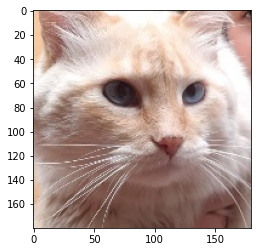

  ** Valor 1550.6705001385692
  ******************************** 
   **********IMAGEN ENTRADA***********  


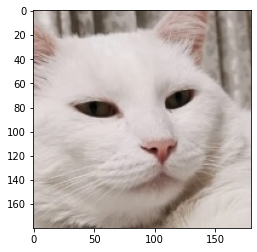

  ******************************** 
********************************


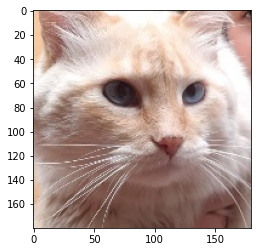

GATO TOP 0 img 1550.6705001385692 Posicion 50 ruta 2.Resultados_Preprocesamiento/Gatos/ROSTRO_REDIMENSIONADO/57_Brown_Criollo/57_Brown_Criollo_3.jpeg
********************************


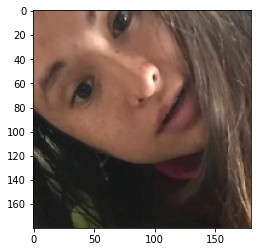

GATO TOP 1 img 1740.665677262581 Posicion 46 ruta 2.Resultados_Preprocesamiento/Gatos/ROSTRO_REDIMENSIONADO/54_Chispita_Calico/54_Chispita_Calico_2.jpeg
********************************


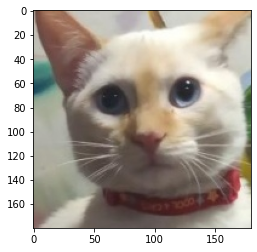

GATO TOP 2 img 1872.0507471754072 Posicion 44 ruta 2.Resultados_Preprocesamiento/Gatos/ROSTRO_REDIMENSIONADO/52_Copito_Criollo/52_Copito_Criollo_4.jpeg
********************************


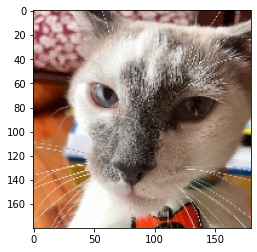

GATO TOP 3 img 1893.0002641309904 Posicion 32 ruta 2.Resultados_Preprocesamiento/Gatos/ROSTRO_REDIMENSIONADO/43_Uma_Criollo/43_Uma_Criollo_1.jpeg
********************************


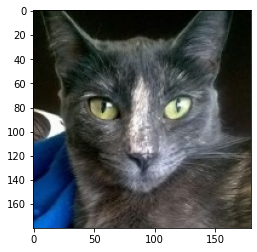

GATO TOP 4 img 1931.4999352834573 Posicion 23 ruta 2.Resultados_Preprocesamiento/Gatos/ROSTRO_REDIMENSIONADO/38_Jaspe_Americano/38_Jaspe_Americano_3.jpeg
********************************


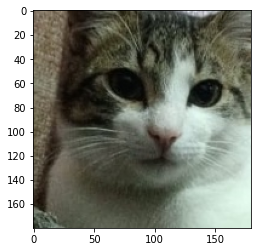

GATO TOP 5 img 1959.3373879962583 Posicion 41 ruta 2.Resultados_Preprocesamiento/Gatos/ROSTRO_REDIMENSIONADO/51_Alpin_Criollo/51_Alpin_Criollo_2.jpeg
********************************


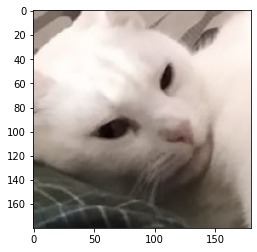

GATO TOP 6 img 1960.282377618082 Posicion 1 ruta 2.Resultados_Preprocesamiento/Gatos/ROSTRO_REDIMENSIONADO/3_Lola_Criollo/3_Lola_Criollo_3.jpeg
********************************


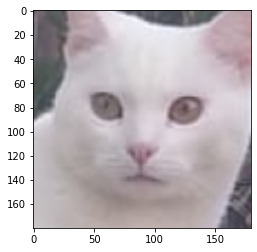

GATO TOP 7 img 2082.2206895523827 Posicion 2 ruta 2.Resultados_Preprocesamiento/Gatos/ROSTRO_REDIMENSIONADO/3_Lola_Criollo/3_Lola_Criollo_5.jpeg
********************************


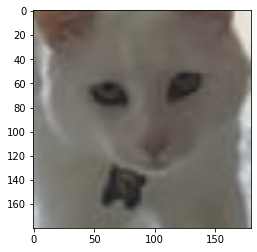

GATO TOP 8 img 2219.0806655009187 Posicion 52 ruta 2.Resultados_Preprocesamiento/Gatos/ROSTRO_REDIMENSIONADO/58_Copito_Siames/58_Copito_Siames_4.jpeg
********************************


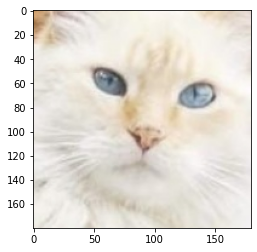

GATO TOP 9 img 2292.6846708607795 Posicion 49 ruta 2.Resultados_Preprocesamiento/Gatos/ROSTRO_REDIMENSIONADO/57_Brown_Criollo/57_Brown_Criollo_2.jpeg


In [110]:

def caso_menu(mopcion):
  if mopcion == 1:
    print('1. Eigen - (Perros - Buscar Perro)')
    seleccion_opcion(mopcion)
  elif mopcion == 2:
    print('2. Eigen - (Gatos - Buscar Gato)')
    seleccion_opcion(mopcion)
  elif mopcion == 3:
    print('3. Fisher - (Perros - Buscar Perro)')
    seleccion_opcion(mopcion)
  elif mopcion == 4:
    print('4. Fisher - (Gatos - Buscar Gato)')
    seleccion_opcion(mopcion)
  elif mopcion == 5:
    print('5. LPBH - (Perros - Buscar Perro)')
    seleccion_opcion(mopcion)
  elif mopcion == 6:
    print('6. LPBH - (Gatos - Buscar Gato)')
    seleccion_opcion(mopcion)
  else:
    print('xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx')
    print('Error: La opción ingresada no esta dentro de las opciones, por favor vuelva a ingresar la opción')
    print('xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx')
    print('')
    print('')
    seleccion_menu()

seleccion_menu()